In [551]:
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import anderson
import scipy.stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
%matplotlib inline
from yahoofinancials import YahooFinancials


In [426]:
start_sp = datetime.datetime(2009, 1, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes for BTC, ETH, XRP, BCH, LTC and set index 
BTC_df = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)
ETH_df = pdr.get_data_yahoo('ETH-USD', start_sp, end_sp)
XRP_df = pdr.get_data_yahoo('XRP-USD', start_sp, end_sp)
BCH_df = pdr.get_data_yahoo('BCH-USD', start_sp, end_sp)
LTC_df = pdr.get_data_yahoo('LTC-USD', start_sp, end_sp)
YUM_df = pdr.get_data_yahoo('YUM', start_sp, end_sp)
AMD_df = pdr.get_data_yahoo('AMD', start_sp, end_sp)

In [611]:
#checking for null data 
BTC_df.isnull().mean()*100
#checking data types
BTC_df.dtypes
#checking number of records
BTC_df.count()
BTC_df.drop_duplicates(subset=None, keep='first')
#BTC_df.describe()
BTC_df_filter = BTC_df.loc[BTC_df.index == '2011-03-27'].copy()
BTC_df_filter

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-03-27,0.8721,0.8152,0.8552,0.820,4439,0.820
2011-03-27,0.8500,0.7600,0.8200,0.799,10141,0.799


In [381]:
ETH_df.isnull().mean()* 100
XRP_df.isnull().mean()* 100
BCH_df.isnull().mean()* 100
LTC_df.isnull().mean()* 100

High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

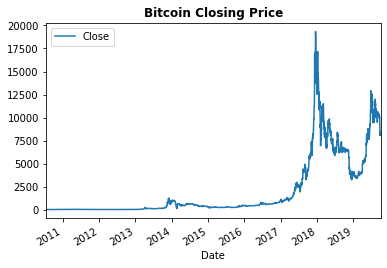

In [586]:
BTC_df.plot(y="Close")
plt.title("Bitcoin Closing Price", weight="bold");

In [587]:

#extracting the closing price and calculating daily returns 
BTC_df_close = (BTC_df['Close'])

#calculate the daily returns and cumulative returns
BTC_df_daily_returns = BTC_df_close.pct_change()
BTC_cum_returns = (1 + BTC_df_daily_returns).cumprod()

# calculate log returns
BTC_df_log_return = np.log(BTC_df_close/BTC_df_close.shift(1)) 

#calculate the average daily returns and standard deviation of daily returns
BTC_df_daily_returns_avg = BTC_df_daily_returns.mean()
BTC_df_daily_returns_STD = BTC_df_daily_returns.std()

#calculate the average log return and standard deviation of log returns
BTC_df_log_return_avg = BTC_df_log_return.mean()
BTC_df_log_return_STD = BTC_df_log_return.std()







Bitcoin Average Daily Return, 0.006047746599280552
Bitcoin STD of Daily Returns, 0.08596218147178858


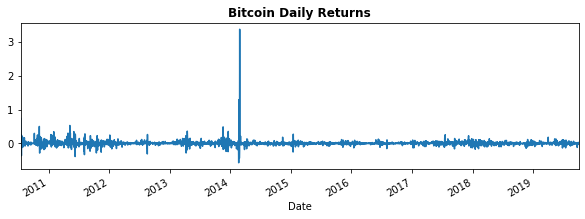

In [588]:
fig = plt.figure()
fig.set_size_inches(10,3)
BTC_df["Close"].pct_change().plot()
plt.title("Bitcoin Daily Returns", weight="bold");
print(f"Bitcoin Average Daily Return, {BTC_df_daily_returns_avg}")
print(f"Bitcoin STD of Daily Returns, {BTC_df_daily_returns_STD}")

Bitcoin STD of Daily Returns, 0.08596218147178858


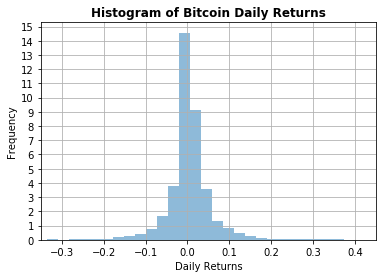

In [589]:
BTC_df["Close"].pct_change().hist(bins=150, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Bitcoin Daily Returns", weight="bold")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 16))
plt.xlim(xmin=-0.35, xmax = 0.45)
print(f"Bitcoin STD of Daily Returns, {BTC_df_daily_returns_STD}")

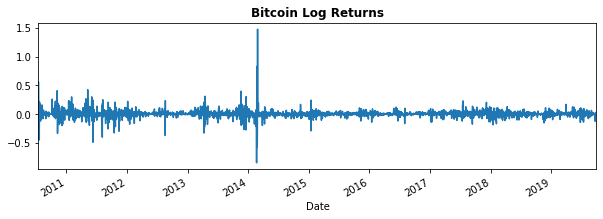

In [590]:
fig = plt.figure()
fig.set_size_inches(10,3)
BTC_df_log_return.plot()
plt.title("Bitcoin Log Returns", weight="bold");

Bitcoin Average Log return, 0.0035792382690113147
Bitcoin STD of Log returns, 0.066459574328333


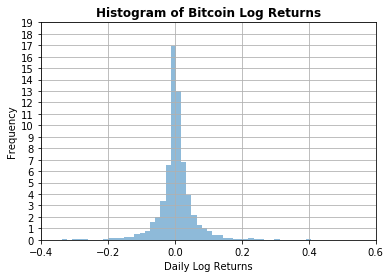

In [591]:
BTC_df_log_return.hist(bins=150, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Bitcoin Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 20))
plt.xlim(xmin=-0.40, xmax = 0.6)

print(f"Bitcoin Average Log return, {BTC_df_log_return_avg}")
print(f"Bitcoin STD of Log returns, {BTC_df_log_return_STD}")

#qqplot(BTC_df_log_return, line='s')

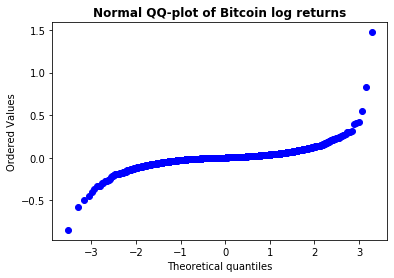

In [593]:
Q = BTC_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Bitcoin log returns", weight="bold");

Ethereum Average Log return, 0.0027028451983488583
Ethereum STD of Log returns, 0.0726991061274896


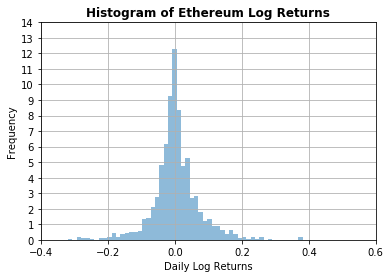

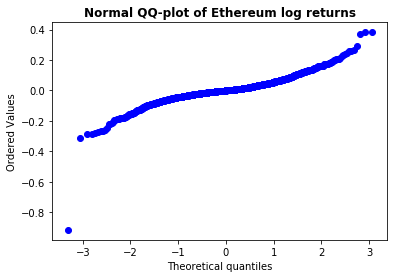

In [557]:
# compare distribution charts to cryptocurrency, Ethereum
# calculate log returns and standard deviation 
ETH_df_close = ETH_df['Close']
ETH_df_daily_return = ETH_df_close.pct_change()
ETH_df_log_return = np.log(ETH_df_close/ETH_df_close.shift(1)) 
ETH_df_log_return_avg = ETH_df_log_return.mean()
ETH_df_log_return_std = ETH_df_log_return.std()

print(f"Ethereum Average Log return, {ETH_df_log_return_avg}")
print(f"Ethereum STD of Log returns, {ETH_df_log_return_std}")

ETH_df_log_return.hist(bins=100, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Ethereum Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 15))
plt.xlim(xmin=-0.40, xmax = 0.6)
plt.show()



Q = ETH_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Ethereum log returns", weight="bold");

YUM Brands Average Log return, 0.0005873383435584336
YUM Brands STD of Log returns, 0.015091666855506362


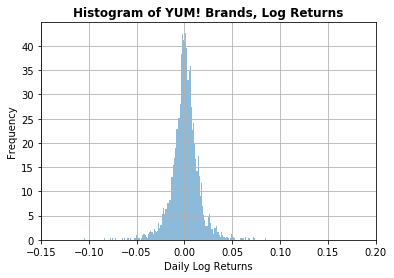

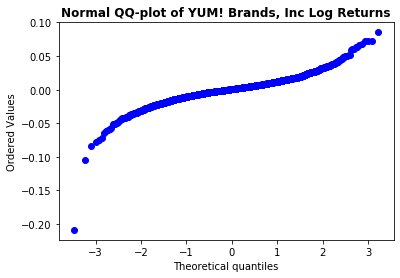

In [559]:
# compare distribution charts to a low volatility stock, YUM
# calculate log returns
YUM_df_close = YUM_df['Close']
YUM_df_log_return = np.log(YUM_df_close/YUM_df_close.shift(1)) 
YUM_df_log_return_avg = YUM_df_log_return.mean()
YUM_df_log_return_std = YUM_df_log_return.std()

print(f"YUM Brands Average Log return, {YUM_df_log_return_avg}")
print(f"YUM Brands STD of Log returns, {YUM_df_log_return_std}")

YUM_df_log_return.hist(bins=250, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of YUM! Brands, Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.xlim(xmin=-0.15, xmax = 0.2)
plt.show()

Q = YUM_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of YUM! Brands, Inc Log Returns", weight="bold");

AMD Brands Average Log return, 0.0009153843048027266
AMD Brands STD of Log returns, 0.037101228838992806


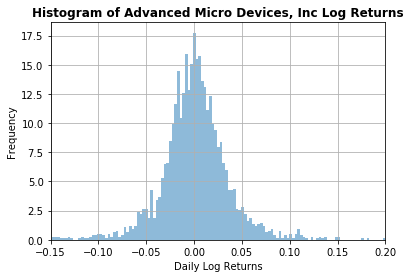

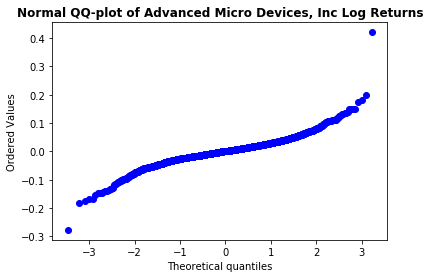

In [560]:
# compare distribution charts to a high volatility stock, AMD
# calculate log returns
AMD_df_close = AMD_df['Close']
AMD_df_log_return = np.log(AMD_df_close/AMD_df_close.shift(1)) 
AMD_df_log_return_avg = AMD_df_log_return.mean()
AMD_df_log_return_std = AMD_df_log_return.std()

print(f"AMD Brands Average Log return, {AMD_df_log_return_avg}")
print(f"AMD Brands STD of Log returns, {AMD_df_log_return_std}")

AMD_df_log_return.hist(bins=250, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Advanced Micro Devices, Inc Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.xlim(xmin=-0.15, xmax = 0.2)
plt.show()

Q = AMD_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Advanced Micro Devices, Inc Log Returns", weight="bold");

In [474]:
# normality tests on BTC
stat, p = normaltest(BTC_df_log_return)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


In [477]:
# normality tests on YUM

stat, p = normaltest(YUM_df_log_return)
print((stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

(nan, nan)
Sample does not look Gaussian (reject H0)


In [478]:

result = anderson(BTC_df_log_return)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [479]:

result = anderson(YUM_df_log_return)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


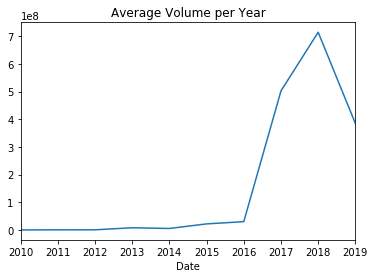

In [315]:
BTC_df_volume = BTC_df['Volume']
BTC_df_yearly_avg_volume = BTC_df_volume.groupby([BTC_df.index.year]).mean()
BTC_df_yearly_avg_volume
BTC_df_yearly_avg_volume.plot(kind='bar', title='Average Volume per Year')


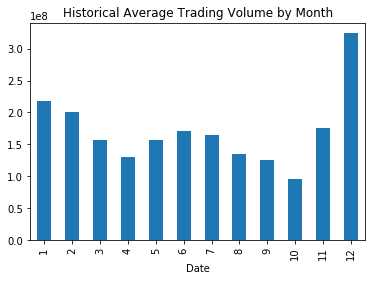

In [323]:
#which months have the highest trading volume, this could be skewed
BTC_df_monthly_avg_volume = BTC_df_volume.groupby([BTC_df.index.month]).mean()
BTC_df_monthly_avg_volume.plot(kind='bar', title='Historical Average Trading Volume by Month') 

In [394]:
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'LTC']
BTC_USD = YahooFinancials('BTC-USD')
BTC_summary = BTC_USD.get_summary_data
BTC_USD.get_daily_low()
BTC_USD.get_three_month_avg_daily_volume()

415229398

In [594]:
BTC_df_log_return.to_csv("BTC_log_return.csv")

C:\Users\jenni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [570]:
BTC_df.to_csv("BTC trading history.csv")